# MNIST Image Classification - Sknn, Theano

In [8]:
import pandas as pd
from sklearn import datasets, cross_validation, metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sknn.mlp import Convolution, Classifier, Layer
%matplotlib inline  

In [25]:
# Function to display single image
def view_image(image, label="", predicted=""):
    if predicted != "":
        print("Predicted: %s" % label , "Actual: %s" % predicted)
    plt.imshow(image, cmap=plt.cm.gray, aspect='auto')
    plt.show()

## Load Data using Sklearn

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
('Image Dimenstions', (8, 8))
0


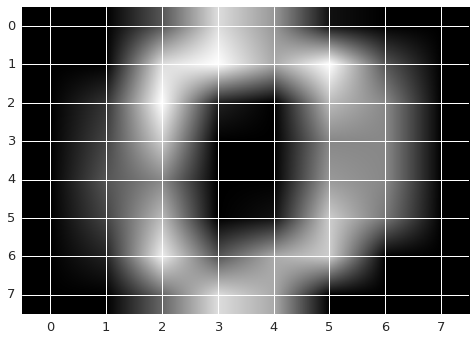

In [27]:
# Load dataset
digits = datasets.load_digits()
X = digits.images
y = digits.target

#image binary data
print (X[0])

#image binary data
print ("Image Dimenstions", X[0].shape)

#image label
print (y[0])

#display image
view_image(X[0])

## Split Data Into Train ,Test

In [28]:
# Split it into train / test subsets
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y,
                                                                     test_size=0.2,
                                                                     random_state=42)

# Split X_train again to create validation data
X_train, X_val, y_train, y_val = cross_validation.train_test_split(X_train,
                                                                   y_train,
                                                                   test_size=0.2,
                                                                   random_state=42)

## Classifiers

### Rectifier 1

In [37]:
layers=[Convolution("Rectifier", name = "Rect1", channels=8, kernel_shape=(3,3)),Layer("Softmax")]
classifier = Classifier(layers = layers,n_iter=100, learning_rate=0.01)

### Rectifier 2

In [38]:
layers=[Convolution("Rectifier", name = "Rect1", channels=8, kernel_shape=(2,2)),Layer("Softmax")]
classifier = Classifier(layers = layers,n_iter=100, learning_rate=0.01)

### Sigmoid

In [45]:
layers=[Convolution("Sigmoid", name = "Sig1", channels=3, kernel_shape=(2,2)),Layer("Softmax")]
classifier = Classifier(layers = layers,n_iter=100, learning_rate=0.01)

## Fit Models

In [40]:
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
score = metrics.accuracy_score (y_test,predicted)
print('Accuracy: {0:f}'.format(score))

[(360, 10)]
Accuracy: 0.977778


In [41]:
confusion_matrices = {}
confusion_matrices["name"] =  pd.crosstab(index=y_test, columns= predicted.ravel(), rownames=['True'], colnames=['Predicted'])

In [42]:
classifiers ={"Model1" : classifier}

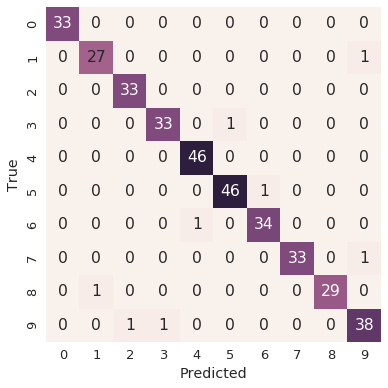

In [43]:
# Plot Confusion Matrices
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))
fix, ax = plt.subplots(figsize=(6, 6))
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 1.5})
for name, matrix in confusion_matrices.items():
    sns.heatmap(matrix, annot=True, square=False, fmt='', cbar=False)

[(360, 10)]
('Predicted: [6]', 'Actual: 6')


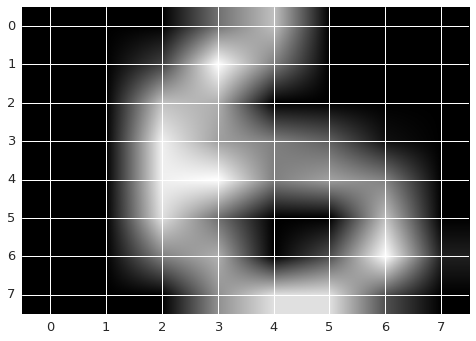

[(360, 10)]
('Predicted: [9]', 'Actual: 9')


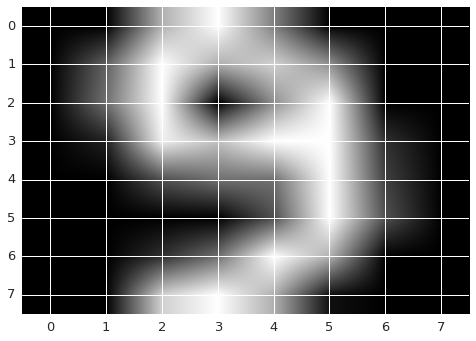

[(360, 10)]
('Predicted: [3]', 'Actual: 3')


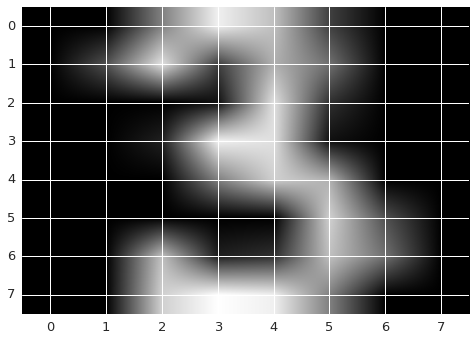

[(360, 10)]
('Predicted: [7]', 'Actual: 7')


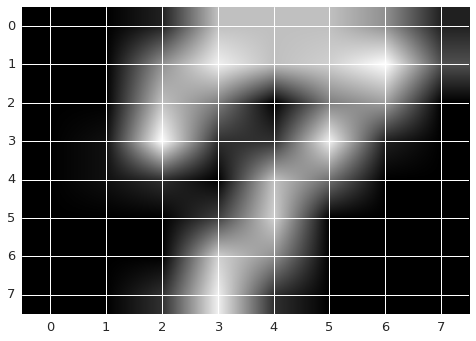

[(360, 10)]
('Predicted: [2]', 'Actual: 2')


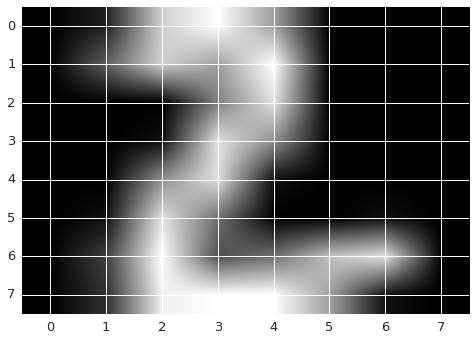

In [44]:
for i in range(0, 5):
    view_image(X_test[i], classifier.predict(X_test)[i], y_test[i])